In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
# Load in our libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# Acquire Data

In [3]:
Train_Path = "/kaggle/input/titanic/train.csv"
Test_Path = "/kaggle/input/titanic/test.csv"
Gender_Submission_Path = "/kaggle/input/titanic/gender_submission.csv"

In [4]:
# Database contain Training Data
# Test_Data contain Testing Data
# Gender_Submission contain sample submission file
Database = pd.read_csv(Train_Path)
Test_Data = pd.read_csv(Test_Path)
Gender_Submission = pd.read_csv(Gender_Submission_Path)

# Analyze by describing data

**First Analyze Traning Data**

In [5]:
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Database.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can observe that in Traning Data Age, Cabin, Embarked column contain missing value.
Most of the value in Cabin column is missing, so we will not use it as a feature. 

In [7]:
Database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
Database.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Analyze Test Data

In [9]:
Test_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
Test_Data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Here we can observe that in Test Data Age, Cabin, Fare column contain missing value.

In [11]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
Test_Data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Feature Engineering

* **Sex**

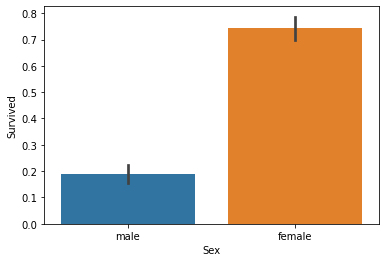

In [13]:
sns.barplot(Database["Sex"], Database["Survived"])

In [14]:
Female_Survival_Rate = len(Database[(Database["Survived"] == 1) & (Database["Sex"] == "female")])/len(Database[Database["Sex"] == "female"])
Male_Survival_Rate = len(Database[(Database["Survived"] == 1) & (Database["Sex"] == "male")])/len(Database[Database["Sex"] == "male"])
print("Male Survival Rate is", Male_Survival_Rate)
print("Female Survival Rate is", Female_Survival_Rate)

Male Survival Rate is 0.18890814558058924
Female Survival Rate is 0.7420382165605095


From graph and survival rate we can obesreve that most of the female survived whereas most of the male died.

So to use Sex as a Feature we will do one-hot encoding

In [15]:
for Data in [Database, Test_Data]:    
    Data["Male"] = Data["Sex"].apply(lambda x: 1 if(x == "male") else 0)
    Data["Female"] = Data["Sex"].apply(lambda x: 1 if(x == "female") else 0)

In [16]:
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


* **Embarked**

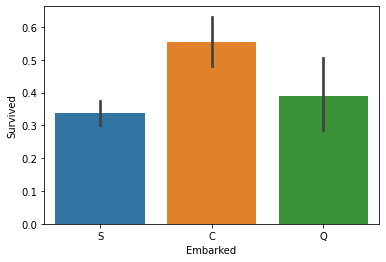

In [17]:
sns.barplot(Database["Embarked"], Database["Survived"])

From graph we can observe that their is a correlation between Embarked and Survival rate. So we will use Embarked

In [18]:
Database["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In training data Embarked contain missing value. So we try to fill with most occured value

In [19]:
Database["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# Most Ocuured value is S
Database["Embarked"] = Database["Embarked"].fillna("S")

To use Embarked as a feature we will one-hot encode it.

In [21]:
for Data in [Database, Test_Data]:    
    Data["Southampton"] = Data["Embarked"].apply(lambda x: 1 if(x == "S") else 0)
    Data["Cherbough"] = Data["Embarked"].apply(lambda x: 1 if(x == "C") else 0)
    Data["Queenstown"] = Data["Embarked"].apply(lambda x: 1 if(x == "Q") else 0)

In [22]:
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female,Southampton,Cherbough,Queenstown
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0


Now we will extract Title from Name feature

* **Title** 

In [23]:
for Data in [Database, Test_Data]:    
    Data["Title"] = Data["Name"].str.extract(pat = '([A-Za-z]+)\.')
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female,Southampton,Cherbough,Queenstown,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,Mr


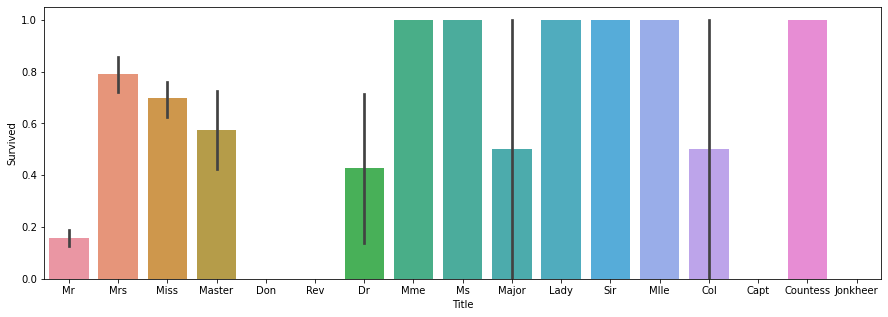

In [24]:
plt.figure(figsize = (15, 5))
sns.barplot(Database["Title"], Database["Survived"])

From graph we can observe that their is some correlation between Title and Survival Rate

In [25]:
Database["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [26]:
Database["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Lady          1
Mme           1
Ms            1
Jonkheer      1
Capt          1
Don           1
Sir           1
Name: Title, dtype: int64

Some Titles have less observation, so we will merge them in Rare.
Then we will one-hot encode them.

In [27]:
for Data in [Database, Test_Data]:
    Data["Title"] = Data["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    Data["Title"] = Data["Title"].replace(["Mlle", "Ms"], "Miss")
    Data["Title"] = Data["Title"].replace("Mme", "Mrs")
    Data["Mr"] = Data["Title"].apply(lambda x: 1 if(x == "Mr") else 0)
    Data["Miss"] = Data["Title"].apply(lambda x: 1 if(x == "Miss") else 0)
    Data["Mrs"] = Data["Title"].apply(lambda x: 1 if(x == "Mrs") else 0)
    Data["Master"] = Data["Title"].apply(lambda x: 1 if(x == "Master") else 0)
    Data["Rare"] = Data["Title"].apply(lambda x: 1 if(x == "Rare") else 0)
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Female,Southampton,Cherbough,Queenstown,Title,Mr,Miss,Mrs,Master,Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,Mr,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,0,Mrs,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,Miss,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0,0,Mrs,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,Mr,1,0,0,0,0


* **Pclass**

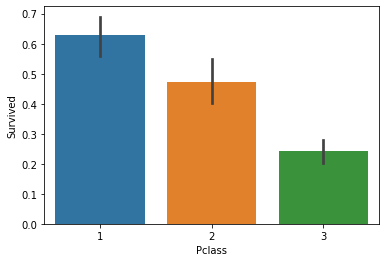

In [28]:
sns.barplot(Database["Pclass"], Database["Survived"])

From graph we can observe that most rich people survived whereas most poor people died.

In [29]:
# To give more weightage to Rich people we will change their label
Database["Pclass"] = Database["Pclass"].map({1:3,3:1,2:2})
Test_Data["Pclass"] = Test_Data["Pclass"].map({1:3,3:1,2:2})
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Female,Southampton,Cherbough,Queenstown,Title,Mr,Miss,Mrs,Master,Rare
0,1,0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,Mr,1,0,0,0,0
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,0,Mrs,0,0,1,0,0
2,3,1,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,Miss,0,1,0,0,0
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0,0,Mrs,0,0,1,0,0
4,5,0,1,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,Mr,1,0,0,0,0


* **Age**

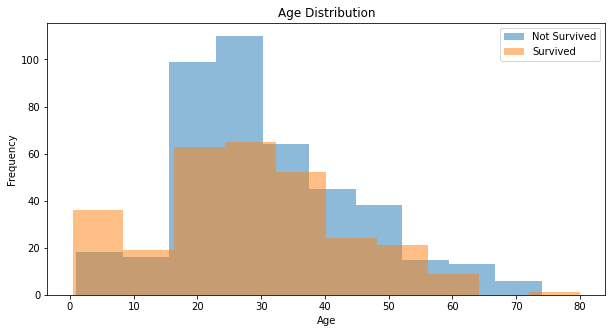

In [30]:
Database.groupby(["Survived"])["Age"].plot(kind = "hist", alpha = 0.5, figsize = (10, 5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.legend(["Not Survived", "Survived"])
plt.show()

From graph we can observe that Most childrens survived whereas adults died.

In [31]:
Database[["Sex", "Age", "Pclass"]].groupby(["Sex", "Pclass"]).mean()

Age
Sex    Pclass           
female 1       21.750000
       2       28.722973
       3       34.611765
male   1       26.507589
       2       30.740707
       3       41.281386

In [32]:
Database[(Database["Sex"] == "female") & (Database["Pclass"] == 1)]["Age"].mean()

21.75

In [33]:
print(Database[Database["Title"] == "Master"]["Age"].mean())
print(Database[(Database["Title"] == "Miss") & (Database["Parch"] == 0)]["Age"].mean())
print(Database[(Database["Title"] == "Miss") & (Database["Parch"] != 0)]["Age"].mean())

4.574166666666667
27.68617021276596
11.863636363636363


Age column contain missing value.
So what we are doing basically is we are using Title, Parch, Sex, Pclass to fill missing value.
Here, if a person has Title "Master" then he must be a child whereas if a person has Title "Miss" and Parch = 0 then she must be an adult whereas if a person has Title "Miss" and Parch != 0 then she must be a child.
For rest of the person that does not have "Miss" or "Master" as a Title we are using Sex, Pclass to fill thier Age.

In [34]:
Database["Age"] = Database["Age"].fillna(0)
Test_Data["Age"] = Test_Data["Age"].fillna(0)
for Data in [Database, Test_Data]:
    for row in Data.index:
        if(Data.loc[row, "Age"] == 0.0):
            if(Data.loc[row, "Title"] == "Miss"):
                if(Data.loc[row, "Parch"] == 0):
                    Data.loc[row, "Age"] = Data[(Data["Title"] == "Miss") & (Data["Parch"] == 0)]["Age"].mean()
                elif(Data.loc[row, "Parch"] != 0):
                    Data.loc[row, "Age"] = Data[(Data["Title"] == "Miss") & (Data["Parch"] != 0)]["Age"].mean()
            elif(Data.loc[row, "Title"] == "Master"):
                Data.loc[row, "Age"] = Data[Data["Title"] == "Master"]["Age"].mean()
            elif(Data.loc[row, "Sex"] == "female"):
                if(Data.loc[row, "Pclass"] == 1):
                    Data.loc[row, "Age"] = Data[(Data["Sex"] == "female") & (Data["Pclass"] == 1)]["Age"].mean()
                elif(Data.loc[row, "Pclass"] == 2):
                    Data.loc[row, "Age"] = Data[(Data["Sex"] == "female") & (Data["Pclass"] == 2)]["Age"].mean()
                elif(Data.loc[row, "Pclass"] == 3):
                    Data.loc[row, "Age"] = Data[(Database["Sex"] == "female") & (Data["Pclass"] == 3)]["Age"].mean()
            elif(Data.loc[row, "Sex"] == "male"):
                if(Data.loc[row, "Pclass"] == 1):
                    Data.loc[row, "Age"] = Data[(Data["Sex"] == "male") & (Data["Pclass"] == 1)]["Age"].mean()
                elif(Data.loc[row, "Pclass"] == 2):
                    Data.loc[row, "Age"] = Data[(Data["Sex"] == "male") & (Data["Pclass"] == 2)]["Age"].mean()
                elif(Data.loc[row, "Pclass"] == 3):
                    Data.loc[row, "Age"] = Data[(Database["Sex"] == "male") & (Data["Pclass"] == 3)]["Age"].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Now basically we are Label encoding Age 

In [35]:
Database["Age_Band"] = pd.cut(Database["Age"], 5)
Database["Age_Band"].unique()

[(16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [36]:
for Data in [Database, Test_Data]:
    Data.loc[(Data["Age"] <= 16.336), "Age"] = 1
    Data.loc[((Data["Age"] > 16.336) & (Data["Age"] <= 32.252)), "Age"] = 2
    Data.loc[((Data["Age"] > 32.252) & (Data["Age"] <= 48.168)), "Age"] = 3
    Data.loc[((Data["Age"] > 48.168) & (Data["Age"] <= 64.084)), "Age"] = 4
    Data.loc[(Data["Age"] > 64.084), "Age"] = 5
    Data["Age"] = Data["Age"].astype(int)
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Southampton,Cherbough,Queenstown,Title,Mr,Miss,Mrs,Master,Rare,Age_Band
0,1,0,1,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,...,1,0,0,Mr,1,0,0,0,0,"(16.336, 32.252]"
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,...,0,1,0,Mrs,0,0,1,0,0,"(32.252, 48.168]"
2,3,1,1,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,...,1,0,0,Miss,0,1,0,0,0,"(16.336, 32.252]"
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,...,1,0,0,Mrs,0,0,1,0,0,"(32.252, 48.168]"
4,5,0,1,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,...,1,0,0,Mr,1,0,0,0,0,"(32.252, 48.168]"


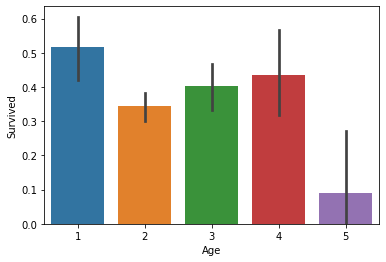

In [37]:
# Graph of Label encoded Age and Survival Rate
sns.barplot(Database["Age"], Database["Survived"])

In [38]:
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Southampton,Cherbough,Queenstown,Title,Mr,Miss,Mrs,Master,Rare,Age_Band
0,1,0,1,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,...,1,0,0,Mr,1,0,0,0,0,"(16.336, 32.252]"
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,...,0,1,0,Mrs,0,0,1,0,0,"(32.252, 48.168]"
2,3,1,1,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,...,1,0,0,Miss,0,1,0,0,0,"(16.336, 32.252]"
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,...,1,0,0,Mrs,0,0,1,0,0,"(32.252, 48.168]"
4,5,0,1,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,...,1,0,0,Mr,1,0,0,0,0,"(32.252, 48.168]"


* **IsAlone**

Here we are creating a feature that will tell us wether a person is travelling Alone or not.

In [39]:
# SibSp :- Number of Siblings/Spouse
# Parch :- Number of Parents/Childrens

In [40]:
Database["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [41]:
Database["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [42]:
Database["Family"] = Database["SibSp"] + Database["Parch"] + 1
Test_Data["Family"] = Test_Data["SibSp"] + Test_Data["Parch"] + 1
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cherbough,Queenstown,Title,Mr,Miss,Mrs,Master,Rare,Age_Band,Family
0,1,0,1,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,...,0,0,Mr,1,0,0,0,0,"(16.336, 32.252]",2
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,...,1,0,Mrs,0,0,1,0,0,"(32.252, 48.168]",2
2,3,1,1,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,...,0,0,Miss,0,1,0,0,0,"(16.336, 32.252]",1
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,...,0,0,Mrs,0,0,1,0,0,"(32.252, 48.168]",2
4,5,0,1,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,...,0,0,Mr,1,0,0,0,0,"(32.252, 48.168]",1


In [43]:
Database["IsAlone"] = Database["Family"].apply(lambda x: 1 if(x != 1) else 0)
Test_Data["IsAlone"] = Test_Data["Family"].apply(lambda x: 1 if(x != 1) else 0)
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Queenstown,Title,Mr,Miss,Mrs,Master,Rare,Age_Band,Family,IsAlone
0,1,0,1,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,...,0,Mr,1,0,0,0,0,"(16.336, 32.252]",2,1
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,...,0,Mrs,0,0,1,0,0,"(32.252, 48.168]",2,1
2,3,1,1,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,...,0,Miss,0,1,0,0,0,"(16.336, 32.252]",1,0
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,...,0,Mrs,0,0,1,0,0,"(32.252, 48.168]",2,1
4,5,0,1,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,...,0,Mr,1,0,0,0,0,"(32.252, 48.168]",1,0


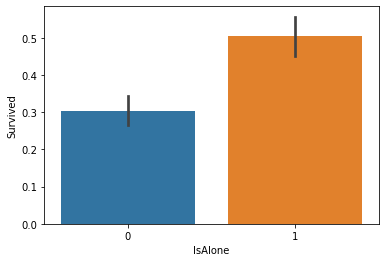

In [44]:
sns.barplot(Database["IsAlone"], Database["Survived"])

From graph we can observe that person travelling alone has more survival rate.
So we will us IsAlone as a feature.

* **Fare**

Basically we are label encoding Fare

In [45]:
Database["Fare_Band"] = pd.qcut(Database["Fare"],4)
Database["Fare_Band"].unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

Test Data contain missing Fare value. So we are filling it with median fare value

In [46]:
Test_Data["Fare"].fillna(Test_Data['Fare'].dropna().median(), inplace=True)

In [47]:
for Data in [Database, Test_Data]:    
    for row in Data.index:
        if(Data.loc[row, "Fare"] <= 7.91):
            Data.loc[row, "Fare"] = 0
        elif((Data.loc[row, "Fare"] > 7.91) & (Data.loc[row, "Fare"] <= 14.454)):
            Data.loc[row, "Fare"] = 1
        elif((Data.loc[row, "Fare"] > 14.454) & (Data.loc[row, "Fare"] <= 31)):
            Data.loc[row, "Fare"] = 2
        else:
            Data.loc[row, "Fare"] = 3
Database["Fare"] = Database["Fare"].astype(int)
Test_Data["Fare"] = Test_Data["Fare"].astype(int)
Database.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Mr,Miss,Mrs,Master,Rare,Age_Band,Family,IsAlone,Fare_Band
0,1,0,1,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,...,Mr,1,0,0,0,0,"(16.336, 32.252]",2,1,"(-0.001, 7.91]"
1,2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,3,...,Mrs,0,0,1,0,0,"(32.252, 48.168]",2,1,"(31.0, 512.329]"
2,3,1,1,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,1,...,Miss,0,1,0,0,0,"(16.336, 32.252]",1,0,"(7.91, 14.454]"
3,4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,3,...,Mrs,0,0,1,0,0,"(32.252, 48.168]",2,1,"(31.0, 512.329]"
4,5,0,1,"Allen, Mr. William Henry",male,3,0,0,373450,1,...,Mr,1,0,0,0,0,"(32.252, 48.168]",1,0,"(7.91, 14.454]"


In [48]:
Test_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cherbough,Queenstown,Title,Mr,Miss,Mrs,Master,Rare,Family,IsAlone
0,892,1,"Kelly, Mr. James",male,3,0,0,330911,0,NaN,...,0,1,Mr,1,0,0,0,0,1,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",female,3,1,0,363272,0,NaN,...,0,0,Mrs,0,0,1,0,0,2,1
2,894,2,"Myles, Mr. Thomas Francis",male,4,0,0,240276,1,NaN,...,0,1,Mr,1,0,0,0,0,1,0
3,895,1,"Wirz, Mr. Albert",male,2,0,0,315154,1,NaN,...,0,0,Mr,1,0,0,0,0,1,0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2,1,1,3101298,1,NaN,...,0,0,Mrs,0,0,1,0,0,3,1


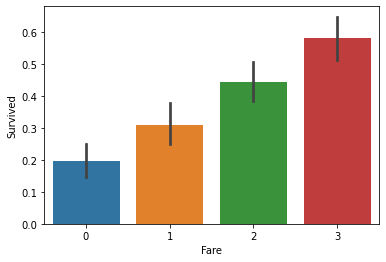

In [49]:
sns.barplot(Database["Fare"], Database["Survived"])

From graph we can observe that survival rate is more for people giving more Fare. So we will use it as our feature 

In [50]:
# Drop all unnecessary columns
Database.drop(columns = ["PassengerId", "Name", "Sex", "SibSp", "Parch", "Embarked", "Title", "Age_Band", "Family", "Cabin", "Ticket", "Fare_Band"], inplace = True)
Test_Data.drop(columns = ["Name", "Sex", "SibSp", "Parch", "Embarked", "Title", "Family", "Cabin", "Ticket"], inplace = True)

Finnal Training and Testing Data

In [51]:
Database.head()

,Survived,Pclass,Age,Fare,Male,Female,Southampton,Cherbough,Queenstown,Mr,Miss,Mrs,Master,Rare,IsAlone
0,0,1,2,0,1,0,1,0,0,1,0,0,0,0,1
1,1,3,3,3,0,1,0,1,0,0,0,1,0,0,1
2,1,1,2,1,0,1,1,0,0,0,1,0,0,0,0
3,1,3,3,3,0,1,1,0,0,0,0,1,0,0,1
4,0,1,3,1,1,0,1,0,0,1,0,0,0,0,0


In [52]:
Test_Data.head()

,PassengerId,Pclass,Age,Fare,Male,Female,Southampton,Cherbough,Queenstown,Mr,Miss,Mrs,Master,Rare,IsAlone
0,892,1,3,0,1,0,0,0,1,1,0,0,0,0,0
1,893,1,3,0,0,1,1,0,0,0,0,1,0,0,1
2,894,2,4,1,1,0,0,0,1,1,0,0,0,0,0
3,895,1,2,1,1,0,1,0,0,1,0,0,0,0,0
4,896,1,2,1,0,1,1,0,0,0,0,1,0,0,1


In [53]:
X = Database[["Pclass", "Age", "Fare", "Male", "Female", "Southampton", "Cherbough", "Queenstown", "Mr", "Miss", "Mrs", "Master", "Rare", "IsAlone"]]
y = Database["Survived"]
Test_X = Test_Data[["Pclass", "Age", "Fare", "Male", "Female", "Southampton", "Cherbough", "Queenstown", "Mr", "Miss", "Mrs", "Master", "Rare", "IsAlone"]]

# Modeling

# Ensembling and Stacking

Basically what here we are doing is we are making prediction from all level 0 models and giving that to level 1 model and prediction from level 1 model is used as our final ans.

In [54]:
# Level 0 Models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

# Level 1 Model
level1 = LogisticRegression()

model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

model.fit(X, y)


Final = model.predict(Test_X)


# Submission 

In [55]:
Submission = pd.DataFrame({
        "PassengerId": Test_Data["PassengerId"],
        "Survived": Final
        })
Submission.to_csv('Submission.csv', index=False)